# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from gensim.models import FastText
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import auc
import nltk
import re
from nltk.tokenize import wordpunct_tokenize
from collections import Counter
nltk.download('popular', quiet=True)
import warnings
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, confusion_matrix, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
class TextCleaner:
  def __init__(self, remove_links=True, remove_mentions_and_hashtags=True, 
               replace_emojis_with_meaningful_tokens=True, remove_emojis=False, remove_consecutive_duplicate_letters=True,
               remove_numbers=True, remove_punctuation=True, only_arabic_chars=False, remove_stop_words=True, letters_normalization=True, remove_j_shift= True):
    self.remove_links = remove_links
    self.remove_mentions_and_hashtags = remove_mentions_and_hashtags
    self.replace_emojis_with_meaningful_tokens = replace_emojis_with_meaningful_tokens
    self.remove_emojis = remove_emojis
    self.remove_consecutive_duplicate_letters = remove_consecutive_duplicate_letters
    self.remove_numbers = remove_numbers
    self.remove_punctuation = remove_punctuation
    self.only_arabic_chars = only_arabic_chars
    self.remove_stop_words = remove_stop_words
    self.letters_normalization = letters_normalization
    self.remove_j_shift = remove_j_shift

  
  def clean_text(self, document):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              "]+", flags=re.UNICODE)
    
    def delete_consecutive_strings(s):
        i=0
        j=0
        new_elements=''
        while(j<len(s)):
            if( s[i]==s[j] ):
                j+=1
            elif((s[j]!=s[i]) or (j==len(s)-1)):
                new_elements+=s[i]
                i=j
                j+=1
        new_elements+=s[j-1]
        return new_elements
    # Remove URLs
    if self.remove_links:
      document = re.sub('http\S+', '', document)

    # Remove mentions and hashtags
    if self.remove_mentions_and_hashtags:
      document = re.sub('[@#]\w+', '', document)

    # Replacing emojis with meaningful tokens
    if self.replace_emojis_with_meaningful_tokens:
      document = re.sub('[😍❤️❤💜💙🖤💓💗💚💝💘💖💕🤍💛❣️💞🌹🥰💟💑]', ' حبحب ', document)
      document = re.sub('[🐶🐕🐷🐖🐴🐄🐮🐂🐃🐵🐒🙉🐑🐐🐸🦄]', ' حيواناتحيوانات ', document)
      document = re.sub('[😡🤬😠😤🤮🤢😣😷😒🙄]', ' معصبمعصب ', document)
      document = re.sub('[👊👊🏽👊🏻👊🏼👊🏾👊🏿🔪]', ' عنفعنف ', document)
      document = re.sub('[✋✋🏽✋🏻✋🏿✋🏼✋🏾]', ' يديد ', document)
      document = re.sub('[🖕🖕🏽🖕🏻🖕🏿🖕🏼🖕🏾]', ' الوسطىالوسطى ', document)
      document = re.sub('[😂🤣😭💀]', ' ضحكضحك ', document)
      document = re.sub('[💩👠👞]', ' عدماحترامعدماحترام ', document)
      document = re.sub('[😢💔]', ' حزينحزين ', document)
      document = re.sub('🤔', ' يفكريفكر ', document)
      document = re.sub('🔥', ' نارنار ', document)
      document = re.sub('👎', ' عدمإعجابعدمإعجاب ', document)
      #document = emoji_pattern.sub(' إيموجيإيموجي ', document)


    # Remove emojis
    if self.remove_emojis:
      document = emoji_pattern.sub('', document)

    # Remove consecutive duplicate letters
    if self.remove_consecutive_duplicate_letters:
      try:
        document = delete_consecutive_strings(document)
      except:
        pass

    # Remove numbers
    if self.remove_numbers:
      document = re.sub('\d+', '', document)

    # Remove punctuation marks
    if self.remove_punctuation:
      punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~،؟!.؛'
      document = document.translate(str.maketrans('', '', punctuation))


    # # Remove stop words
    if self.remove_stop_words:
      stop_words = nltk.corpus.stopwords.words('arabic')
      stopwords_dict = Counter(stop_words)
      document = ' '.join([word for word in document.split() if word not in stopwords_dict])

    # # Only keep Arabic characters
    if self.only_arabic_chars:
      document = re.sub('[^\[\]_ء-ي]', ' ', document)

    # Normalize arabic letters
    if self.letters_normalization:
      document = re.sub('[أإءئى]', 'ا', document)
      document = re.sub('ص', 'س', document)
      document = re.sub('ظ', 'ض', document)

    # # Remove ـ
    if self.remove_j_shift:
      document = re.sub('ـ', '', document)

    # # Replacing the multiple spaces between words with 1 space
    document = re.sub(' +', ' ', document)
    document = document.strip()
    return document

In [3]:
c1 = TextCleaner(remove_links=True, remove_mentions_and_hashtags=True, 
                 replace_emojis_with_meaningful_tokens=True, remove_emojis=True, remove_consecutive_duplicate_letters=True,
                 remove_numbers=True, remove_punctuation=True, only_arabic_chars=True, remove_stop_words=True, 
                 letters_normalization=True, remove_j_shift= True)
s='ttrtyhjyhj @user @ahmad حـــــررراااممم [] ______ !!!!!!! ? @ ! ؟ 😋😋 99 💩👎😡🖕🔪🐶 صين طويل https://twitter.com في الشارع و على الطريق طـويل أنـت سـريـع'
c1.clean_text(s)

'حرام عدماحترامعدماحترام عدماعجابعدماعجاب معسبمعسب الوسطاالوسطا عنفعنف حيواناتحيوانات سين طويل الشارع الطريق طويل انت سريع'

# Reading the train and test datasets

In [4]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

# Converting the text column into numpy array for both the train and test datasets

In [5]:
trainCorpus = X_train['text'].values
testCorpus = X_test['text'].values
valCorpus = X_val['text'].values
print(trainCorpus)
print()
print(testCorpus)
print()
print(valCorpus)

['كله بيشبه كله مين بدو يحاكم مين ما في الا؟سلطة الشعب '
 'RT @USER العناق😯<LF>ان تاتي بعطر<LF>وترحل بعطرين<LF><LF>_مدري ايش قصدهم<LF>بس شكلها تخفيضات😷😂'
 '@USER برا من غير مطرود من رابطة الكتلان الأبيّة 🔪' ...
 'شر البلية ما يضخك في كل يوم تتدحرجين إلى قعر الهزل من السياسة وضبابية الرؤية'
 '@USER كله إلا الشرف . البندقه ياهريدي😠' '@USER ربنا معاكي 👊']

['الله يلعنكم (الكومنت) عقبال ماتتسممون وتحترقون واتطيحون فحفرة مخلفات كيماوية وتصيحون ليل ونهار بدون مخدر يعلكم تتبهدلون طول حياتكم الزق الارف مسودين الويه اااالللهفغخغبغخفهزناهااالللبهغهفيهفخغخخغبخغبغخ 🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪 URL'
 'برب بروح لسجني الخاص🔪🚶🏻\u200d♀️'
 'ولعها ولع ولع وأعطيني شحطة العقاب لوهاب وهاب قاتل ابو دياب ' ...
 'يعني هو عندو بنتين محبوسات بقصر مدري وين و بنت محجوزة ب مشفى معرف وين و بنت تشتغل موديل و عندها معرض فن تشكيلي مدري ايش؟ وات ذا هيل؟'
 'كمبيوتر المدرسة وطابعتها تقصر العمر 😤'
 '@USER يمال شقول وين راحت سوالفكم الشكل مايهم اهم شي الاخلاق 🔪😡']

['اخلصي علينا يا فاطمه مب صاحي ساعه فحوصات☺️🖕🏻 URL'
 '@USER عيش 

# Cleaning and then tokenizing using wordpunct_tokenize from nltk because FastText excpects the input to be tokens

In [6]:
max_seq = -1
vocab = set()
for i in range(len(trainCorpus)):
  trainCorpus[i] = c1.clean_text(trainCorpus[i])
  trainCorpus[i] = wordpunct_tokenize(trainCorpus[i])
  if len(trainCorpus[i]) > max_seq:
    max_seq = len(trainCorpus[i])

for list1 in trainCorpus:
  for token in list1:
    vocab.add(token)

for i in range(len(testCorpus)):
  testCorpus[i] = c1.clean_text(testCorpus[i])
  testCorpus[i] = wordpunct_tokenize(testCorpus[i])
  if len(testCorpus[i]) > max_seq:
    max_seq = len(testCorpus[i])

for list1 in testCorpus:
  for token in list1:
    vocab.add(token)

for i in range(len(valCorpus)):
  valCorpus[i] = c1.clean_text(valCorpus[i])
  valCorpus[i] = wordpunct_tokenize(valCorpus[i])
  if len(valCorpus[i]) > max_seq:
    max_seq = len(valCorpus[i])

for list1 in valCorpus:
  for token in list1:
    vocab.add(token)

print(trainCorpus)
print()
print(testCorpus)
print()
print(valCorpus)
print()
print('Max_seq =', max_seq)
print('vocab size =', len(vocab))

[list(['كله', 'بيشبه', 'كله', 'مين', 'بدو', 'يحاكم', 'مين', 'الاسلطة', 'الشعب'])
 list(['العناق', 'ان', 'تاتي', 'بعطر', 'وترحل', 'بعطرين', 'مدري', 'ايش', 'قسدهم', 'بس', 'شكلها', 'تخفيضات', 'معسبمعسب', 'ضحكضحك'])
 list(['برا', 'مطرود', 'رابطة', 'الكتلان', 'الابي', 'ة', 'عنفعنف']) ...
 list(['شر', 'البلية', 'يضخك', 'يوم', 'تدحرجين', 'قعر', 'الهزل', 'السياسة', 'وضبابية', 'الرؤية'])
 list(['كله', 'الشرف', 'البندقه', 'ياهريدي', 'معسبمعسب'])
 list(['ربنا', 'معاكي', 'عنفعنف'])]

[list(['اله', 'يلعنكم', 'الكومنت', 'عقبال', 'ماتسمون', 'وتحترقون', 'واتطيحون', 'فحفرة', 'مخلفات', 'كيماوية', 'وتسيحون', 'ليل', 'ونهار', 'بدون', 'مخدر', 'يعلكم', 'تبهدلون', 'طول', 'حياتكم', 'الزق', 'الارف', 'مسودين', 'الويه', 'الهفغخغبغخفهزناهالبهغهفيهفخغخغبخغبغخ', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف', 'عنفعنف'])
 list(['برب', 'بروح', 'لسجن

# Training FastText. Vector size is 20, moving window size is 5, minimum count of a word to be taken is 1, which means all the words in the corpus will be taken
# sg=0 means to choose CBOW (Skip-gram = False)

In [7]:
FastText_model = FastText(sentences=trainCorpus, vector_size=300, window=2, min_count=1, sg=0)

In [8]:
FastText_model.build_vocab(trainCorpus)

In [9]:
FastText_model.train(trainCorpus, total_examples=FastText_model.corpus_count, epochs=30)

(2925855, 3326220)

In [10]:
FastText_model.wv.most_similar('يلعن')

[('يلعنم', 0.9942151308059692),
 ('يلعنكن', 0.9891696572303772),
 ('يلعنك', 0.9865669012069702),
 ('لعن', 0.9831696152687073),
 ('لعنك', 0.9626113772392273),
 ('يلعنمه', 0.9609421491622925),
 ('يرحم', 0.960375189781189),
 ('رحم', 0.9586336016654968),
 ('يحفضه', 0.9567623734474182),
 ('يلعنكم', 0.955888032913208)]

In [11]:
FastText_model.wv.most_similar('قتل')

[('هقتل', 0.9966872930526733),
 ('بياية', 0.9941959381103516),
 ('مسيحية', 0.9928918480873108),
 ('بوفية', 0.9928337931632996),
 ('سيرة', 0.992598831653595),
 ('ثورة', 0.9913656711578369),
 ('ضروريا', 0.9906452894210815),
 ('بمقتل', 0.9904462695121765),
 ('لقتل', 0.9902122616767883),
 ('كلية', 0.990082323551178)]

In [19]:
FastText_model.wv.most_similar('وسخ')

[('وسخة', 0.9740120768547058),
 ('وسهلا', 0.9726600646972656),
 ('لابن', 0.9725161790847778),
 ('بلادها', 0.9683541059494019),
 ('وسذج', 0.9668481945991516),
 ('وفعلا', 0.9656927585601807),
 ('ولادن', 0.9641855955123901),
 ('وسال', 0.9633702039718628),
 ('فاس', 0.9625791311264038),
 ('ولااو', 0.9621647596359253)]

In [20]:
FastText_model.wv.most_similar('قاتل')

[('قااد', 0.9831037521362305),
 ('قاهرة', 0.98190838098526),
 ('يحكو', 0.9783686995506287),
 ('بيقاتل', 0.9760727286338806),
 ('بينطر', 0.9760434627532959),
 ('بوجود', 0.9759060144424438),
 ('بيحكوا', 0.9753230810165405),
 ('تقاتل', 0.9751132726669312),
 ('قابضة', 0.9744106531143188),
 ('قاتلة', 0.9735556244850159)]

# We used summation of FastText representation to make each sentence into one vector

In [13]:
def vector_maker(data):
  OneTokenEmbedding = np.zeros(300)
  vectors = []
  for sentence in data:
    for token in sentence:
      if token in FastText_model.wv.index_to_key:
        OneTokenEmbedding += FastText_model.wv[token]
    vectors.append(OneTokenEmbedding)
  return vectors

X_train = vector_maker(trainCorpus)
y_train = y_train.label.values

X_val = vector_maker(valCorpus)
y_val = y_val.label.values

X_test = vector_maker(testCorpus)
y_test = y_test.label.values

In [15]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print(len(X_val), len(y_val))

9756 9756
4647 4647
4182 4182


# Training ML models

In [16]:
model1 = SVC(kernel='rbf', gamma=10, C=1)
model1.fit(X_train, y_train)

SVC(C=1, gamma=10)

# Evaluating the models

AUC = 0.5
Recall = 0.0000
Precision = 0.0000
F1_score = 0.0000
Accuracy = 0.7956


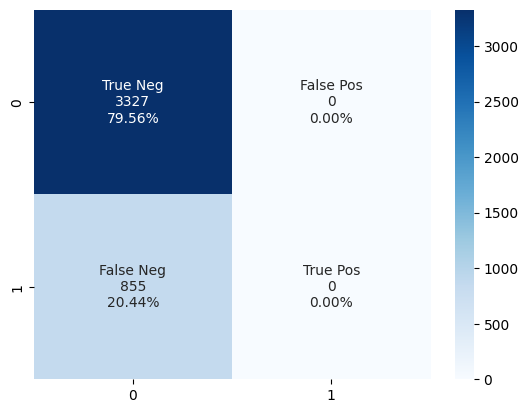

AUC = 0.5
Recall = 0.0000
Precision = 0.0000
F1_score = 0.0000
Accuracy = 0.7900


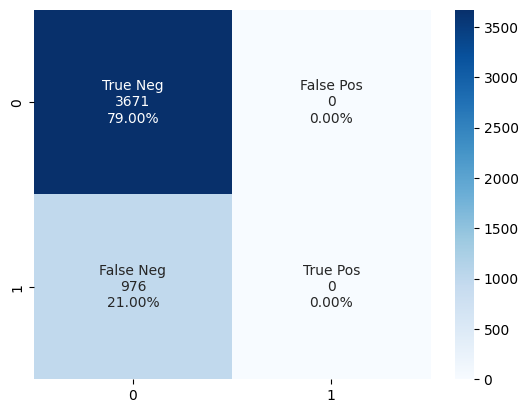

In [17]:
y_pred = model1.predict(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
print('AUC =', auc(fpr, tpr))
print(f'Recall = {recall_score(y_val, y_pred):0.4f}')
print(f'Precision = {precision_score(y_val, y_pred):0.4f}')
print(f'F1_score = {f1_score(y_val, y_pred):0.4f}')
print(f'Accuracy = {accuracy_score(y_val, y_pred):0.4f}')

cf_matrix = confusion_matrix(y_val, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()


y_pred = model1.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC =', auc(fpr, tpr))
print(f'Recall = {recall_score(y_test, y_pred):0.4f}')
print(f'Precision = {precision_score(y_test, y_pred):0.4f}')
print(f'F1_score = {f1_score(y_test, y_pred):0.4f}')
print(f'Accuracy = {accuracy_score(y_test, y_pred):0.4f}')

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [18]:
unique, counts = np.unique(y_train, return_counts=True)
unique

array([0, 1])